## using sklearn

#  Linear Regression

### Dataset Creation:

Generate a dataset with a linear relationship between x and y.

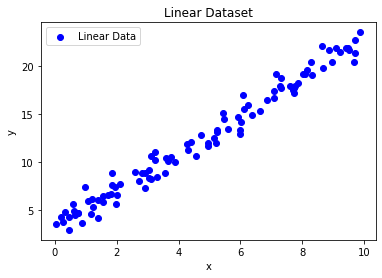

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x_linear = np.random.rand(100, 1) * 10
y_linear = 2 * x_linear + 3 + np.random.randn(100, 1)

plt.scatter(x_linear, y_linear, color='blue', label="Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Dataset")
plt.legend()
plt.show()

### Regression Analysis & Visualization:

Perform linear regression and visualize the fit.

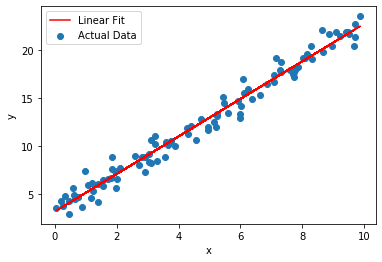

Linear Regression MSE: 0.8065845639670535


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_linear = LinearRegression()
model_linear.fit(x_linear, y_linear)
y_pred_linear = model_linear.predict(x_linear)

mse_linear = mean_squared_error(y_linear, y_pred_linear)

plt.scatter(x_linear, y_linear, label="Actual Data")
plt.plot(x_linear, y_pred_linear, label="Linear Fit", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Linear Regression MSE: {mse_linear}")

### Prediction Model:

Predict for new values.

In [3]:
def predict_linear(model, x_new):
    x_new = np.array(x_new).reshape(-1, 1)
    y_new_pred = model.predict(x_new)
    for x_val, y_val in zip(x_new.flatten(), y_new_pred.flatten()):
        print(f"For x = {x_val}, Linear Regression predicts: {y_val}")

x_new = [2, 5, 8]
predict_linear(model_linear, x_new)

For x = 2, Linear Regression predicts: 7.123141512122142
For x = 5, Linear Regression predicts: 12.985209543985233
For x = 8, Linear Regression predicts: 18.847277575848324


## Non-Linear Regression

### Dataset Creation:

Generate a dataset with a quadratic (non-linear) relationship.

np.random.seed(42)
x_nonlinear = np.random.rand(100, 1) * 10
y_nonlinear = 2 + 3 * x_nonlinear**2 + np.random.randn(100, 1)

plt.scatter(x_nonlinear, y_nonlinear, color='red', label="Non-Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linear Dataset")
plt.legend()
plt.show()


Regression Analysis & Visualization:

Linear regression fit may not work well on non-linear data

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Step 2: Polynomial Regression for non-linear data
poly_features = PolynomialFeatures(degree=2)
x_nonlinear_poly = poly_features.fit_transform(x_nonlinear)

#Perform polynomial regression
model_poly = LinearRegression()
model_poly.fit(x_nonlinear_poly, y_nonlinear)
y_pred_poly = model_poly.predict(x_nonlinear_poly)

mse_poly = mean_squared_error(y_nonlinear, y_pred_poly)

#Plot the polynomial regression result
plt.scatter(x_nonlinear, y_nonlinear, label="Actual Data")
plt.plot(x_nonlinear, y_pred_poly, label="Polynomial Fit (Quadratic)", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Polynomial Regression MSE (Non-linear Data): {mse_poly}")

predict_linear(model_linear, x_new)


##  Polynomial Regression


### Dataset Creation:

Create polynomial data.

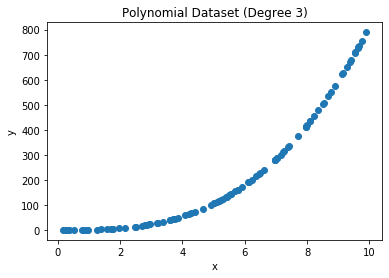

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Dataset creation
def create_polynomial_dataset(degree, num_samples, noise_std=0.1):
    x = np.random.rand(num_samples, 1) * 10
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    coefs = np.random.randn(degree + 1)
    y = np.dot(x_poly, coefs) + np.random.normal(0, noise_std, num_samples)
    return x, y

# Create dataset
x_poly, y_poly = create_polynomial_dataset(3, 100)

# Plot original x values
plt.scatter(x_poly[:, 0], y_poly)  # Use x_poly[:, 0] or simply x
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Dataset (Degree 3)")
plt.show()


### Regression Analysis & Visualization:

Fit polynomial regression to data.

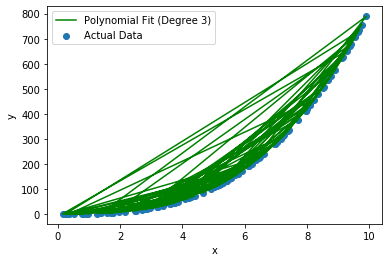

Polynomial Regression MSE: 0.007787504752239525


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Polynomial transformation
poly_features = PolynomialFeatures(degree=3)
x_poly_transformed = poly_features.fit_transform(x_poly[:, 0].reshape(-1, 1))  # Transform original x values

# Fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(x_poly_transformed, y_poly)

# Predict
y_pred_poly = model_poly.predict(x_poly_transformed)
mse_poly = mean_squared_error(y_poly, y_pred_poly)

# Plot polynomial regression result
plt.scatter(x_poly[:, 0], y_poly, label="Actual Data")
plt.plot(x_poly[:, 0], y_pred_poly, label="Polynomial Fit (Degree 3)", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print Mean Squared Error
print(f"Polynomial Regression MSE: {mse_poly}")


### Prediction Model:

Predict using the polynomial model.

In [10]:
def predict_poly(model, poly_features, x_new):
    x_new = np.array(x_new).reshape(-1, 1)  # Ensure it's in the correct shape
    x_new_poly = poly_features.transform(x_new)  # Transform with polynomial features
    y_new_pred = model.predict(x_new_poly)  # Predict new values
    
    # Print predictions
    for x_val, y_val in zip(x_new.flatten(), y_new_pred):
        print(f"For x = {x_val:.2f}, Polynomial Regression predicts: {y_val:.2f}")

# Example usage for predictions
x_new = [2, 5, 8]
predict_poly(model_poly, poly_features, x_new)

For x = 2.00, Polynomial Regression predicts: 7.82
For x = 5.00, Polynomial Regression predicts: 105.65
For x = 8.00, Polynomial Regression predicts: 420.62
